In [1]:
import numpy as np
import pandas as pd
from music21 import *
import pickle
from KojakLibrary import ProcessMusic as KJPM
from IPython.display import clear_output

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def remove_dupes(input_list):
    new_list = [input_list[0]]
    for item in input_list[1:]:
        if item != new_list[-1]:
            new_list.append(item)
    return new_list

In [3]:
with open('df_song_links_chord_melody_seq.pkl', 'rb') as pkl:
    df_song_links_chord_melody_seq = pickle.load(pkl)

In [4]:
with open('df_song_links.pkl', 'rb') as pkl:
    df_song_links = pickle.load(pkl)

In [4]:
melodies = df_song_links_chord_melody_seq['Melody_Data'].apply(lambda x: np.array(x)).values

In [5]:
melodies = [np.array(remove_dupes(melody)) for melody in melodies]

In [6]:
melodies[0]

array([10,  9,  3,  2,  8,  7,  1,  0,  7,  1,  8,  0,  7,  1,  8,  0,  7,
        0,  7,  8,  3,  1,  7,  0,  7,  0,  7,  4, 11,  9,  4,  2,  9,  4,
       11,  9,  4, 11,  6, 11,  6, 11,  6,  4,  9,  2,  7,  0,  7,  0,  7,
        0,  7,  5,  0,  7,  0,  7,  2,  0,  7,  0,  5,  0, 10,  5, 10,  4,
       11,  4,  3, 10,  2,  9,  2,  7,  2,  3,  8,  0,  7,  0,  7,  8,  3,
        1,  7,  0,  7,  0,  7,  4, 11,  9,  4,  2,  9,  4, 11,  9,  4, 11,
        6, 11,  6, 11,  6,  4,  9,  2,  7,  0,  7,  0,  7,  0,  7,  5,  0,
        7,  0,  7,  2,  0,  7,  0,  5,  0, 10,  5, 10,  4, 11,  4,  3, 10,
        2,  9,  2,  7,  2,  3,  8,  0,  7,  0,  7,  8,  3,  1,  7,  0,  7,
        0,  7,  4, 11,  9,  4,  2,  9,  4, 11,  9,  4, 11,  6, 11,  6, 11,
        6,  4,  9,  2,  7,  0,  7,  0,  7,  0,  7,  5,  0,  7,  0,  7,  2,
        0,  7,  0,  5,  0, 10,  5, 10,  4, 11,  4,  3, 10,  2,  9,  2,  7,
        2,  3,  8,  0,  7,  0,  7,  8,  3,  1,  7,  0,  7,  0,  7,  4, 11,
        9,  4,  2,  9,  4

In [7]:
# my_midi = KJPM.load_midi('bruno_mars-locked_out_of_heaven.mid')
# my_midi = KJPM.load_midi('TLC_-_No_Scrubs.mid')
my_midi = KJPM.load_midi('Test_Clip.mid')

In [8]:
music_parts = [part for part in my_midi.parts]

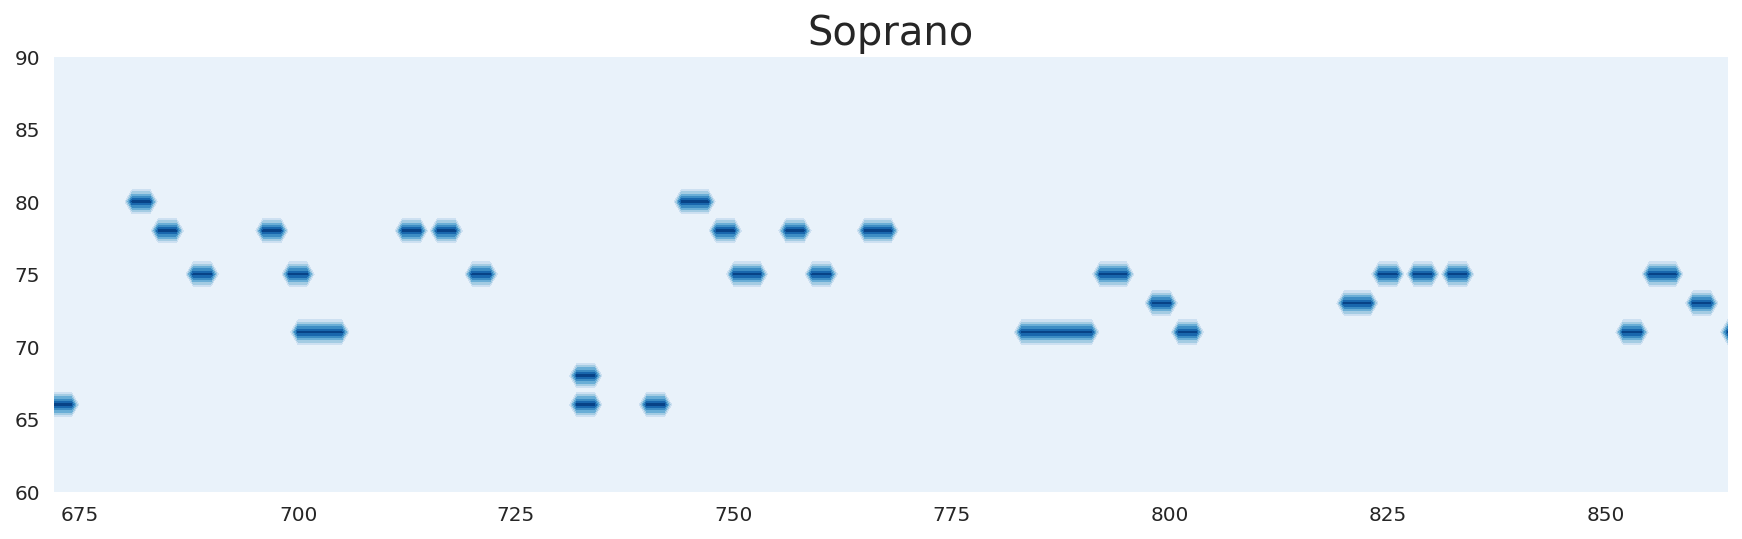

In [9]:
cmap = plt.cm.get_cmap("Blues")
start_plot = 14
end_plot = 4
for i, part in enumerate(music_parts):
    try:
        plt.figure(figsize=(15,4))
        plt.contourf(KJPM.create_grid(part), cmap=cmap)
        plt.title(part.partName, fontsize=20)
#         plt.title('Melody', fontsize=20)
        plt.xlim(start_plot*48, start_plot*48 + end_plot*48)
        plt.ylim(60,90)
    except:
        print('Error')
        continue

In [10]:
x = part.analyze('key')
x.pitches[0].midi+0
x

<music21.key.Key of g# minor>

In [11]:
part = [p for p in music_parts if p.partName == 'Soprano'][0]
part_key = part.analyze('key')
part_notes = []
for p in part.recurse():
    try:
        if p.isNote:
            part_notes.append(p)
    except:
        continue

In [12]:
def notes2seq(seq, inp_key, inp_mode):
    primary_key = key.Key(inp_key, inp_mode)
    primary_root = primary_key.getTonic().pitchClass
    note_seq = []
    for i, s in enumerate(seq):
        clear_output(wait=True)
        print('%d/%d' % (i+1, len(seq)))
        
        if s.isNote:
            new_note = s.pitchClass
            note_offset = new_note - primary_root
            note_offset = new_note - primary_root
            if note_offset < 0:
                note_offset = note_offset + 12
                
            if (len(note_seq) > 0) and (note_seq[-1] == note_offset):
                continue
            else:
                note_seq.append(note_offset)
    return note_seq

In [13]:
melody_sequence = notes2seq(part_notes, part_key.tonic, part_key.mode)
melody_sequence = np.array(melody_sequence[3:])

650/650


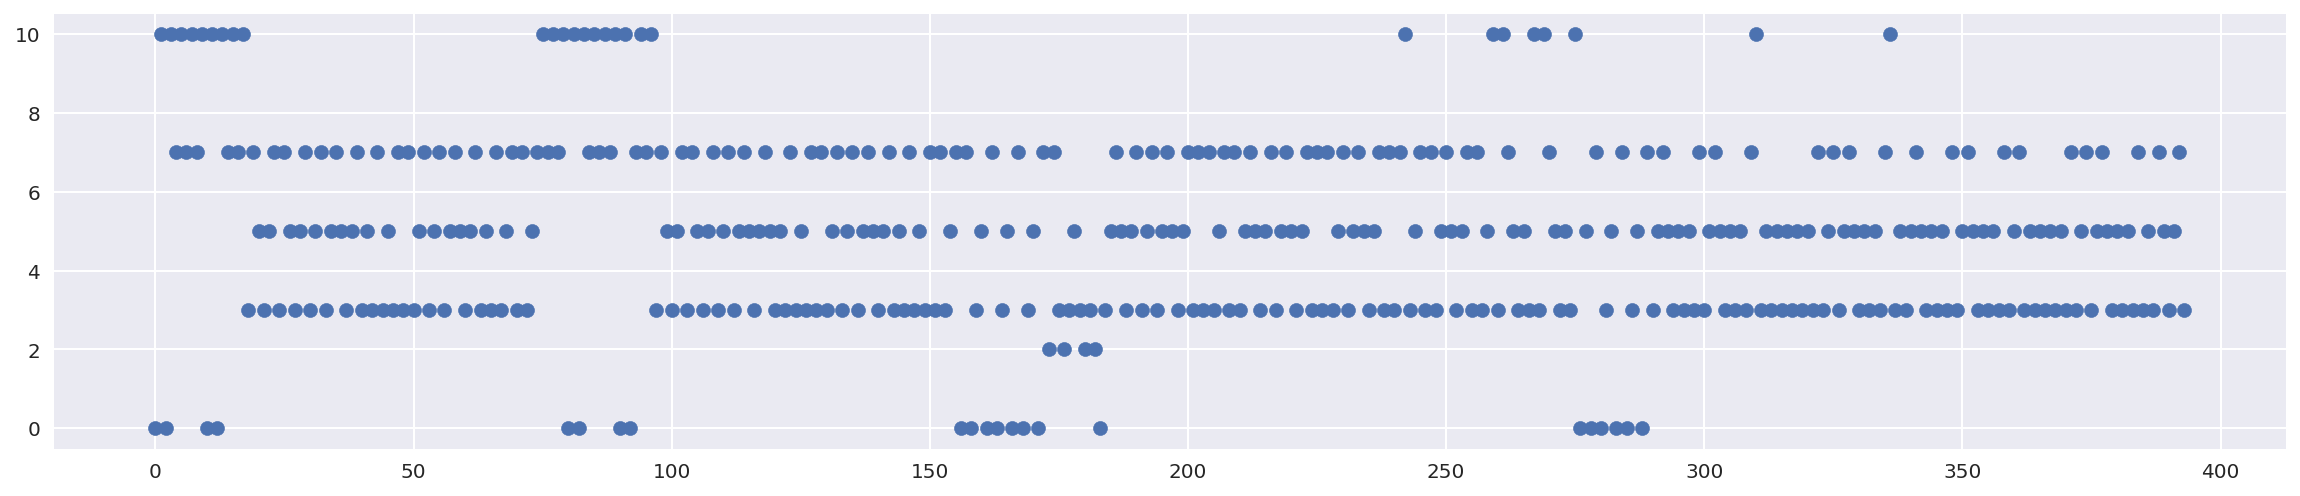

In [14]:
plt.figure(figsize=(20,4))
# plt.scatter(x=range(len(melody_sequence[:20])), y=melody_sequence[:20])
plt.scatter(x=range(len(melody_sequence)), y=melody_sequence)

In [15]:
[p for p in music_parts[0].recurse()][5:]

[<music21.note.Rest rest>,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note F#>,
 <music21.note.Note F#>,
 <music21.note.Note G#>,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note E->,
 <music21.note.Note F#>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note E->,
 <music21.note.Note C#>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <mu

In [16]:
df_song_links_chord_melody_seq[df_song_links_chord_melody_seq['Song'] == 'automnminnewyork.mid'].iloc[0]['Chord_Data'][:2]

[{'Chord_Root': 'G',
  'Chord_Root_Num': 7,
  'Normal_Form': [0, 3, 5, 8],
  'Normal_Order': [2, 5, 7, 10],
  'PitchCommonName': 'G3-minor seventh chord',
  'Pitch_Names': ['G', 'B-', 'D', 'F'],
  'Raw_Chord': '<music21.roman.RomanNumeral ii7 in F major>',
  'Roman_Numeral': 'ii',
  'Song_Root': 'F',
  'Song_Root_Mode': 'major',
  'Song_Root_Num': 7},
 {'Chord_Root': 'E',
  'Chord_Root_Num': 4,
  'Normal_Form': [0, 2, 5, 8],
  'Normal_Order': [2, 4, 7, 10],
  'PitchCommonName': 'E4-half-diminished seventh chord',
  'Pitch_Names': ['B-', 'D', 'E', 'G'],
  'Raw_Chord': '<music21.roman.RomanNumeral vii/o43 in F major>',
  'Roman_Numeral': 'vii',
  'Song_Root': 'F',
  'Song_Root_Mode': 'major',
  'Song_Root_Num': 4}]

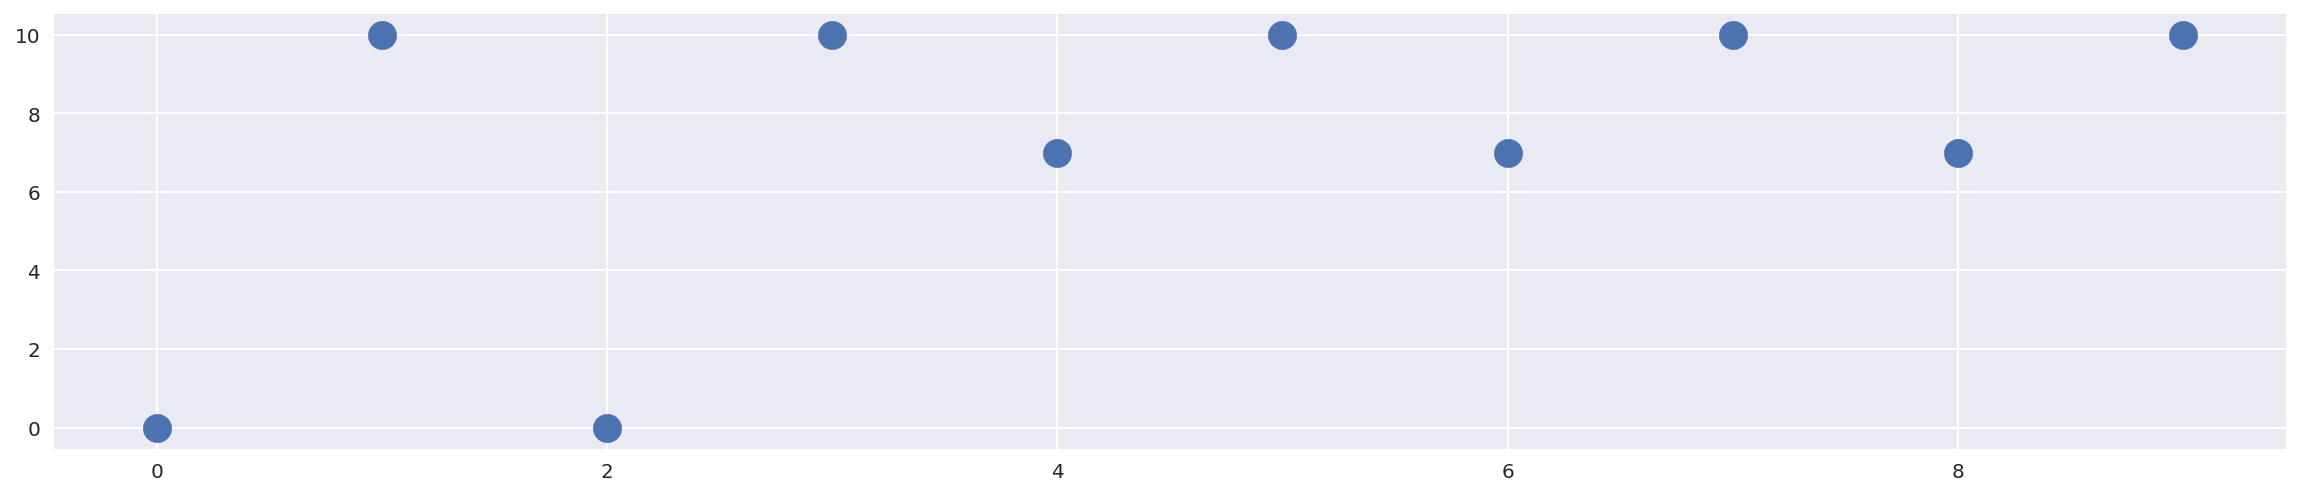

In [22]:
seq_sect = range(0,10)
plt.figure(figsize=(20,4))
# plt.scatter(x=range(len(melody_sequence[:20])), y=melody_sequence[:20])
plt.scatter(x=range(len(seq_sect)), y=melody_sequence[seq_sect], s=200)

In [23]:
target_sequence = ','.join([str(x) for x in melody_sequence[seq_sect].tolist()])

In [24]:
jazz_sequences = []
for seq in melodies:
    jazz_sequences.append(','.join([str(x) for x in seq.tolist()]))

In [25]:
for seq in jazz_sequences:
    if target_sequence in seq:
        print("Found")

In [26]:
print(target_sequence)

0,10,0,10,7,10,7,10,7,10


In [27]:
print(jazz_sequences[89])

10,7,10,0,2,5,7,8,0,2,1,8,7,10,7,8,3,2,3,0,2,10,8,5,8,4,6,10,5,7,3,2,9,8,9,0,8,7,8,5,3,0,7,10,0,3,1,0,10,8,4,5,7,8,10,0,3,0,1,2,5,8,10,11,1,11,8,7,5,3,4,1,10,8,7,10,2,7,0,10,0,8,7,5,0,4,7,5,7,8,10,0,3,2,10,0,8,1,11,10,8,6,7,2,7,2,7,2,5,7,10,11,0,11,8,6,5,2,3,5,7,8,10,2,7,6,2,10,9,8,0,8,3,1,3,1,3,0,3,0,8,5,10,7,0,7,8,5,3,2,3,5,2,10,2,3,2,3,0,8,7,11,9,6,2,11,5,2,3,5,7,8,10,0,1,3,1,0,3,5,3,0,10,5,9,0,9,5,7,5,2,5,7,9,7,9,2,3,2,7,8,9,10,7,2,10,0,8,6,5,7,10,0,3,0,10,8,5,3,2,3,2,0,7,3,2,3,5,2,0,4,6,8,10,1,2,4,8,10,11,2,3,0,3,0,8,5,10,8,11,8,9,10,5,6,2,1,11,10,8,7,5,9,0,7,5,4,0,5,8,4,5,8,10,0,2,3,1,4,7,8,7,8,10,0,2,3,5,7,8,3,10,0,5,2,7,5,10,7,8,1,10,2,0,3,5,0,8,9,5,10,0,2,7,8,3,7,0,7,0,1,7,2,0,10,8,2,7,5,10,0,3,0,6,1,2,7,1,4,7,1,8,10,0


In [28]:
def target_distances(target_sequence, jazz_sequences):
    n = len(target_sequence)
    dist = []
    for k,jazz in enumerate(jazz_sequences):
        s=-1
        d = []
        while True:
            e=0;j=0
            for i in range(s+1,len(jazz)):
                if j>=n:
                    break
                if jazz[i]==target_sequence[j]:
                    if j==0:
                        s=i
                    elif j==n-1:
                        e=i
                    j+=1
            if e:
                d.append((e-s+1,k))
            else:
                d.append((100000,k))
                break
        dist.append(min(d))
    print(min(dist))
    return dist

In [29]:
dist = target_distances(target_sequence, jazz_sequences)

(34, 17)


In [30]:
df_matches = pd.DataFrame(sorted(dist)[1:], columns=['Distance', 'Melody ID'])
df_matches['Song Name'] = df_matches['Melody ID'].apply(lambda x: df_song_links_chord_melody_seq.iloc[x]['Song'])
df_matches.drop_duplicates(subset='Song Name', inplace=True)
df_matches.set_index('Melody ID', inplace=True)
df_matches = df_matches[['Song Name', 'Distance']]
df_matches.head(10)

,Song Name,Distance
Melody ID,,
127,tutu.mid,34
152,fever.mid,37
83,maputo2.mid,40
150,Brazil.mid,42
166,howhightthemoon.mid,44
195,killerjoe.mid,45
139,thismasquerade.mid,49
92,funnyvalentine.mid,50
234,lullubyofbirdland.mid,50


In [31]:
# n = len(target_sequence)
# dist = []
# for k,jazz in enumerate(jazz_sequences):
#     i=0;j=0;s=0;e=0
#     for i in range(len(jazz)):
#         if j>=n:
#             break
#         if jazz[i]==target_sequence[j]:
#             if j==0:
#                 s=i
#             elif j==n-1:
#                 e=i
#             j+=1
#     if e:
#         dist.append((e-s,k))
#     else:
#         dist.append((100000,k))
# min(dist)

In [34]:
print(target_sequence)

0,10,0,10,7,10,7,10,7,10


In [35]:
print(jazz_sequences[127])

3,2,5,3,2,3,2,0,5,7,2,5,3,2,3,5,10,7,5,3,5,2,3,5,3,2,0,2,0,7,10,0,5,7,2,3,5,7,5,9,5,10,7,0,7,2,7,3,5,7,3,5,10,0,10,9,7,5,3,9,5,4,3,7,5,3,2,5,3,2,0,3,2,0,10,2,0,10,9,0,10,9,7,10,9,7,5,3,5,0,2,0,7,0,2,3,2,0,5,10,3,5,7,10,0,7,10,5,9,2,0,5,2,7,5,0,10,9,7,5,3,5,7,2,3,5,0,2,3,2,10,7,0,10,7,0,10,2,10,7,0,10,7,0,10,7,0,10,7,0,10,2,3,5,2,3,5,7,9,0,2,3,5,7,9,10,2,3,5,7,9,10,0,2,3,5,7,9,10,0,2,3,2,3,5,7,9,10,0,1,2,3,5,7,8,9,10,0,2,3,5,2,3,0,2,7,0,2,3,5,3,5,7,8,10,0,2,5,3,0,10,0,7,5,3,10,0,2,10,0,5,8,10,3,10,8,5,3,11,6,1,11,6,5,11,3,6,9,4,3,9,7,5,0,10,8,3,7,2,7,0,5,2,5,3,5,3,0,7,5,3,5,3,0,7,5,3,5,3,0,7,5,3,5,3,0,7,0,3,5,6,7,10,0,10,2,10,0,10,7,5,0,7,5,3,0,7,0,3,8,1,4,9,2,4,10,3,5,11,4,6,0,5,7,1,6,8,2,7,9,3,8,10,4,9,11,0,2,3,5,3,0,7,10,2,10,2,5,2,3,5,7,10,5,0,2,3,7,10,8,7,10,5,3,10,7,5,0,2,5,7,2,7,2,8,7,2,0,10,7,5,3,2,0,8,7,5,7,2,5,3,10,7,0,10,2,5,9,0,4,5,9,0,5,7,0,4,2,0,5,4,0,3,5,10,3,5,3,10,5,3,1,2,7,10,2,7,2,7,10,7,2,0,5,4,0,5,10,0,3,5,8,10,0,3,5,8,6,3,0,10,8,7,0,7,10,8,5,6,7,6,5,3,2,0,5,3,2,10,

In [29]:
df_song_links_chord_melody_seq.iloc[184][0]

'so_what.mid'

In [30]:
part_key

<music21.key.Key of g# minor>